In [6]:
pip install git+https://github.com/openworm/PyOpenWorm.git


  Cloning https://github.com/openworm/PyOpenWorm.git to /tmp/pip-req-build-u0316pxr
  Running command git clone --filter=blob:none --quiet https://github.com/openworm/PyOpenWorm.git /tmp/pip-req-build-u0316pxr
  Resolved https://github.com/openworm/PyOpenWorm.git to commit 16a9199b803c26119f2d227395da1ccf608d6ad9
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


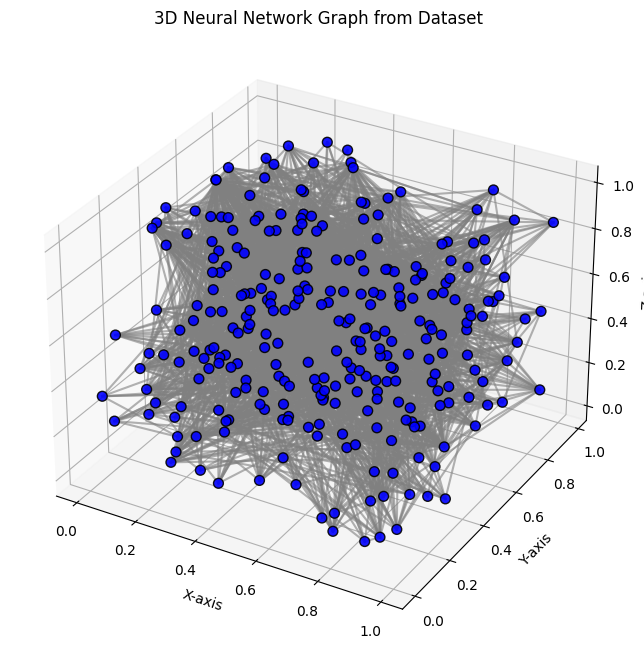

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the dataset
file_path = '/kaggle/input/celegans123/NeuronConnect.csv'  # Path to your uploaded file
data = pd.read_csv(file_path)

# Create a graph
G = nx.Graph()

# Add edges from the dataset
for _, row in data.iterrows():
    neuron1 = row['Neuron 1']
    neuron2 = row['Neuron 2']
    weight = row['Nbr']  # Weight based on "Nbr"
    edge_type = row['Type']  # Edge attribute for the type
    G.add_edge(neuron1, neuron2, weight=weight, type=edge_type)

# Generate 3D positions for the nodes
pos_3d = {node: np.random.rand(3) for node in G.nodes()}

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract edges and draw them
for edge in G.edges(data=True):
    x_coords = [pos_3d[edge[0]][0], pos_3d[edge[1]][0]]
    y_coords = [pos_3d[edge[0]][1], pos_3d[edge[1]][1]]
    z_coords = [pos_3d[edge[0]][2], pos_3d[edge[1]][2]]
    ax.plot(x_coords, y_coords, z_coords, color='gray', alpha=0.6)

# Draw nodes
x_vals = [pos[0] for pos in pos_3d.values()]
y_vals = [pos[1] for pos in pos_3d.values()]
z_vals = [pos[2] for pos in pos_3d.values()]
ax.scatter(x_vals, y_vals, z_vals, c='blue', s=50, edgecolor='black', alpha=0.9)

# Set plot labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('3D Neural Network Graph from Dataset')

# Display the graph
plt.show()


Modularity Score: 0.47481842442881994


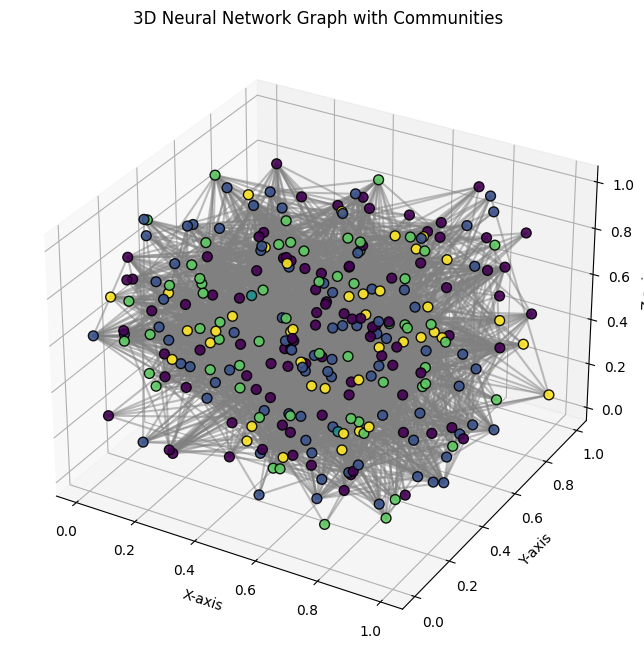

0.47481842442881994

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import community as community_louvain

# Load the dataset from the correct Kaggle input path
file_path = '/kaggle/input/celegans123/NeuronConnect.csv'  # Path to the uploaded file in Kaggle
data = pd.read_csv(file_path)

# Create a graph
G = nx.Graph()

# Add edges from the dataset
for _, row in data.iterrows():
    neuron1 = row['Neuron 1']
    neuron2 = row['Neuron 2']
    weight = row['Nbr']  # Weight based on "Nbr"
    edge_type = row['Type']  # Edge attribute for the type
    G.add_edge(neuron1, neuron2, weight=weight, type=edge_type)

# Apply modularity clustering using Louvain method
partition = community_louvain.best_partition(G)
modularity_score = community_louvain.modularity(partition, G)

# Print modularity score
print(f"Modularity Score: {modularity_score}")

# Assign colors based on detected communities
node_colors = [partition[node] for node in G.nodes()]

# Generate 3D positions for the nodes
pos_3d = {node: np.random.rand(3) for node in G.nodes()}

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw edges
for edge in G.edges(data=True):
    x_coords = [pos_3d[edge[0]][0], pos_3d[edge[1]][0]]
    y_coords = [pos_3d[edge[0]][1], pos_3d[edge[1]][1]]
    z_coords = [pos_3d[edge[0]][2], pos_3d[edge[1]][2]]
    ax.plot(x_coords, y_coords, z_coords, color='gray', alpha=0.5)

# Draw nodes with the assigned colors based on communities
x_vals = [pos_3d[node][0] for node in G.nodes()]
y_vals = [pos_3d[node][1] for node in G.nodes()]
z_vals = [pos_3d[node][2] for node in G.nodes()]
scatter = ax.scatter(x_vals, y_vals, z_vals, c=node_colors, s=50, cmap=plt.cm.viridis, edgecolor='black', alpha=0.9)

# Set axis labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('3D Neural Network Graph with Communities')

# Show the plot
plt.show()

# Return the modularity score
modularity_score


Mean Modularity Score: 0.4705091470147871
Standard Deviation of Modularity Score: 0.005369142012358169


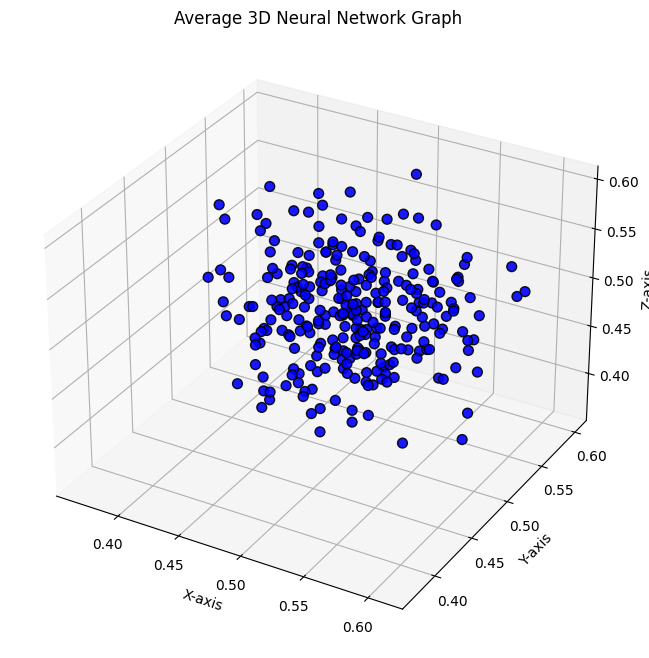

In [17]:
import pandas as pd
import networkx as nx
import numpy as np
import community as community_louvain
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset from the correct Kaggle input path
file_path = '/kaggle/input/celegans123/NeuronConnect.csv'  # Path to the uploaded file in Kaggle
data = pd.read_csv(file_path)

# Function to calculate modularity score and generate 3D positions
def generate_3d_positions_and_modularity():
    # Create a graph
    G = nx.Graph()

    # Add edges from the dataset
    for _, row in data.iterrows():
        neuron1 = row['Neuron 1']
        neuron2 = row['Neuron 2']
        weight = row['Nbr']  # Weight based on "Nbr"
        edge_type = row['Type']  # Edge attribute for the type
        G.add_edge(neuron1, neuron2, weight=weight, type=edge_type)

    # Apply modularity clustering using Louvain method
    partition = community_louvain.best_partition(G)
    modularity = community_louvain.modularity(partition, G)
    
    # Generate 3D positions for the nodes (random positions for simplicity)
    pos_3d = {node: np.random.rand(3) for node in G.nodes()}
    
    return pos_3d, modularity

# Run the graph generation, modularity calculation and 3D position generation multiple times (e.g., 50 runs)
num_runs = 50
all_modularities = []
all_positions = []

# Run for multiple iterations and store the modularity score and 3D positions
for _ in range(num_runs):
    positions, modularity = generate_3d_positions_and_modularity()
    all_modularities.append(modularity)
    all_positions.append(positions)

# Calculate the mean and standard deviation of the modularity scores
mean_modularity = np.mean(all_modularities)
std_modularity = np.std(all_modularities)

print(f"Mean Modularity Score: {mean_modularity}")
print(f"Standard Deviation of Modularity Score: {std_modularity}")

# Calculate the average 3D positions for each node
average_positions = {}
for node in all_positions[0].keys():
    avg_x = np.mean([pos[node][0] for pos in all_positions])
    avg_y = np.mean([pos[node][1] for pos in all_positions])
    avg_z = np.mean([pos[node][2] for pos in all_positions])
    average_positions[node] = (avg_x, avg_y, avg_z)

# Plot the average 3D graph
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Separate the x, y, z coordinates
x_vals = [pos[0] for pos in average_positions.values()]
y_vals = [pos[1] for pos in average_positions.values()]
z_vals = [pos[2] for pos in average_positions.values()]

# Plot the nodes with the average positions
scatter = ax.scatter(x_vals, y_vals, z_vals, c='blue', s=50, edgecolor='black', alpha=0.9)

# Set axis labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('Average 3D Neural Network Graph')

# Show the plot
plt.show()


Mean Modularity Score: 0.47020415199209076
Standard Deviation of Modularity: 0.004988153245160574


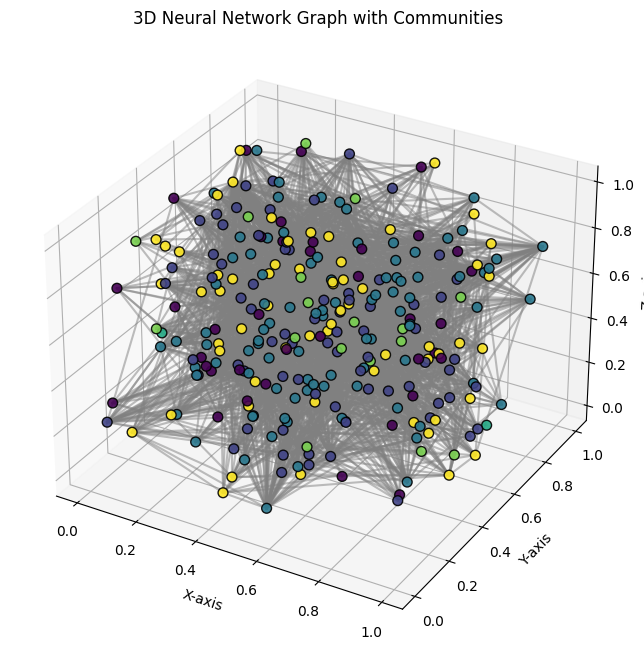

In [20]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import community as community_louvain

# Load the dataset from the correct Kaggle input path
file_path = '/kaggle/input/celegans123/NeuronConnect.csv'  # Path to the uploaded file in Kaggle
data = pd.read_csv(file_path)

# Create a graph
G = nx.Graph()

# Add edges from the dataset
for _, row in data.iterrows():
    neuron1 = row['Neuron 1']
    neuron2 = row['Neuron 2']
    weight = row['Nbr']  # Weight based on "Nbr"
    edge_type = row['Type']  # Edge attribute for the type
    G.add_edge(neuron1, neuron2, weight=weight, type=edge_type)

# Function to calculate modularity
def calculate_modularity():
    # Apply modularity clustering using Louvain method
    partition = community_louvain.best_partition(G)
    modularity_score = community_louvain.modularity(partition, G)
    return modularity_score

# List to store modularity scores for 100 runs
modularity_scores = []

# Run the modularity calculation 100 times and store the results
for _ in range(100):
    modularity_scores.append(calculate_modularity())

# Calculate mean and standard deviation of modularity scores
mean_modularity = np.mean(modularity_scores)
std_modularity = np.std(modularity_scores)

# Print the modularity score mean and standard deviation
print(f"Mean Modularity Score: {mean_modularity}")
print(f"Standard Deviation of Modularity: {std_modularity}")

# Apply modularity clustering using the best partition for visualization
partition = community_louvain.best_partition(G)
modularity_score = community_louvain.modularity(partition, G)

# Assign colors based on detected communities
node_colors = [partition[node] for node in G.nodes()]

# Generate 3D positions for the nodes
pos_3d = {node: np.random.rand(3) for node in G.nodes()}

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw edges
for edge in G.edges(data=True):
    x_coords = [pos_3d[edge[0]][0], pos_3d[edge[1]][0]]
    y_coords = [pos_3d[edge[0]][1], pos_3d[edge[1]][1]]
    z_coords = [pos_3d[edge[0]][2], pos_3d[edge[1]][2]]
    ax.plot(x_coords, y_coords, z_coords, color='gray', alpha=0.5)

# Draw nodes with the assigned colors based on communities
x_vals = [pos_3d[node][0] for node in G.nodes()]
y_vals = [pos_3d[node][1] for node in G.nodes()]
z_vals = [pos_3d[node][2] for node in G.nodes()]
scatter = ax.scatter(x_vals, y_vals, z_vals, c=node_colors, s=50, cmap=plt.cm.viridis, edgecolor='black', alpha=0.9)

# Set axis labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('3D Neural Network Graph with Communities')

# Show the plot
plt.show()


Modularity Score: 0.4736297733533374


/opt/conda/lib/python3.10/site-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


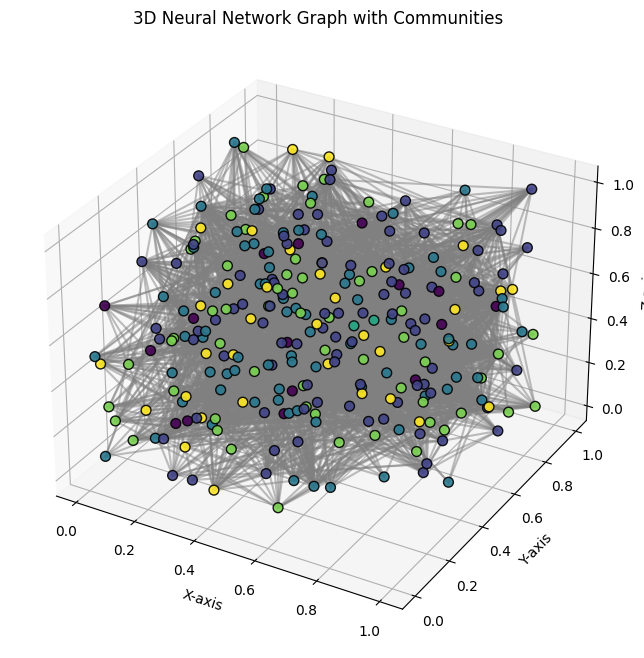

0.4736297733533374

In [24]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import community as community_louvain
from matplotlib.animation import FuncAnimation

# Load the dataset from the correct Kaggle input path
file_path = '/kaggle/input/celegans123/NeuronConnect.csv'  # Path to the uploaded file in Kaggle
data = pd.read_csv(file_path)

# Create a graph
G = nx.Graph()

# Add edges from the dataset
for _, row in data.iterrows():
    neuron1 = row['Neuron 1']
    neuron2 = row['Neuron 2']
    weight = row['Nbr']  # Weight based on "Nbr"
    edge_type = row['Type']  # Edge attribute for the type
    G.add_edge(neuron1, neuron2, weight=weight, type=edge_type)

# Apply modularity clustering using Louvain method
partition = community_louvain.best_partition(G)
modularity_score = community_louvain.modularity(partition, G)

# Print modularity score
print(f"Modularity Score: {modularity_score}")

# Assign colors based on detected communities
node_colors = [partition[node] for node in G.nodes()]

# Generate 3D positions for the nodes
pos_3d = {node: np.random.rand(3) for node in G.nodes()}

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Draw edges
for edge in G.edges(data=True):
    x_coords = [pos_3d[edge[0]][0], pos_3d[edge[1]][0]]
    y_coords = [pos_3d[edge[0]][1], pos_3d[edge[1]][1]]
    z_coords = [pos_3d[edge[0]][2], pos_3d[edge[1]][2]]
    ax.plot(x_coords, y_coords, z_coords, color='gray', alpha=0.5)

# Draw nodes with the assigned colors based on communities
x_vals = [pos_3d[node][0] for node in G.nodes()]
y_vals = [pos_3d[node][1] for node in G.nodes()]
z_vals = [pos_3d[node][2] for node in G.nodes()]
scatter = ax.scatter(x_vals, y_vals, z_vals, c=node_colors, s=50, cmap=plt.cm.viridis, edgecolor='black', alpha=0.9)

# Set axis labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.title('3D Neural Network Graph with Communities')

# Define the rotation function
def update(frame):
    ax.view_init(elev=30, azim=frame)  # Rotate the view
    return scatter,

# Create the animation
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 1), interval=50, blit=False)

# Show the plot
plt.show()

# Return the modularity score
modularity_score
